In [1]:
pwd

'/Users/mose/code/udemy_machine_learnig_a-z/MachineLearning_course_Jose/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
from unicodedata import normalize

In [3]:
df = pd.read_csv("../../../../../Desktop/finn_boliger_final.csv")
df.tail()

,web-scraper-order,web-scraper-start-url,bolig side,bolig side-href,prisantydning,fellegjeld,omkostninger,total pris,felleskost per mnd,boligtype,soverom,primærrom,bruksareal,eierform,etasje,byggeår,energimerking,adresse
1932,1553722973-4289,https://www.finn.no/realestate/homes/search.ht...,(73 solgt 8 igjen) GARASJEPLASSER m STRØMUTTAK...,https://www.finn.no/realestate/homes/ad.html?f...,675 000 kr,400 kr,NaN,NaN,NaN,Garasje/Parkering,0,14 m²,14 m²,Eier (Selveier),1990,NaN,NaN,"Pilestredet Park 11-13, 0165 Oslo"
1933,1553726016-5690,https://www.finn.no/realestate/homes/search.ht...,"ST. HANSHAUGEN - Pen, gjennomgående 3-roms sel...",https://www.finn.no/realestate/homes/ad.html?f...,ST. HANSHAUGEN,2 693 kr,NaN,NaN,NaN,Leilighet,2,90 m²,90 m²,Eier (Selveier),1898,G - rød,rød,"Frydenlundgata 15, 0169 Oslo"
1934,1553725903-5637,https://www.finn.no/realestate/homes/search.ht...,MAJORSTUEN - Meget lekker og delikat eierleili...,https://www.finn.no/realestate/homes/ad.html?f...,MAJORSTUEN,89 000 kr,64 472 kr,2 343 472 kr,2 363 kr,Leilighet,0,19 m²,19 m²,Eier (Selveier),3,1932,rød,"Kirkeveien 57, 0368 Oslo"
1935,1553723924-4731,https://www.finn.no/realestate/homes/search.ht...,Torshov - Rålekker og særdeles romslig 2-roms ...,https://www.finn.no/realestate/homes/ad.html?f...,3 980 000 kr,419 888 kr,4 960 kr,4 404 848 kr,4 200 kr,Leilighet,1,63 m²,63 m²,Andel,2,1901,rød,"Vossegata 34 a, 0475 Oslo"
1936,1553724694-5081,https://www.finn.no/realestate/homes/search.ht...,KJELSÅS. LEKKER 3R ENDEL. M STOR BALKONG - Lys...,https://www.finn.no/realestate/homes/ad.html?f...,KJELSÅS. LEKKER 3R ENDEL. M STOR BALKONG,224 000 kr,15 119 kr,5 039 119 kr,3 764 kr,Leilighet,2,66 m²,66 m²,Andel,1951,F - rød,rød,"Fallanveien 35, 0495 Oslo"


In [4]:
np.shape(df)

(1937, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 18 columns):
web-scraper-order        1937 non-null object
web-scraper-start-url    1937 non-null object
bolig side               1937 non-null object
bolig side-href          1937 non-null object
prisantydning            1937 non-null object
fellegjeld               1647 non-null object
omkostninger             1540 non-null object
total pris               1496 non-null object
felleskost per mnd       912 non-null object
boligtype                1650 non-null object
soverom                  1650 non-null object
primærrom                1650 non-null object
bruksareal               1650 non-null object
eierform                 1647 non-null object
etasje                   1820 non-null object
byggeår                  1785 non-null object
energimerking            1435 non-null object
adresse                  1937 non-null object
dtypes: object(18)
memory usage: 272.5+ KB


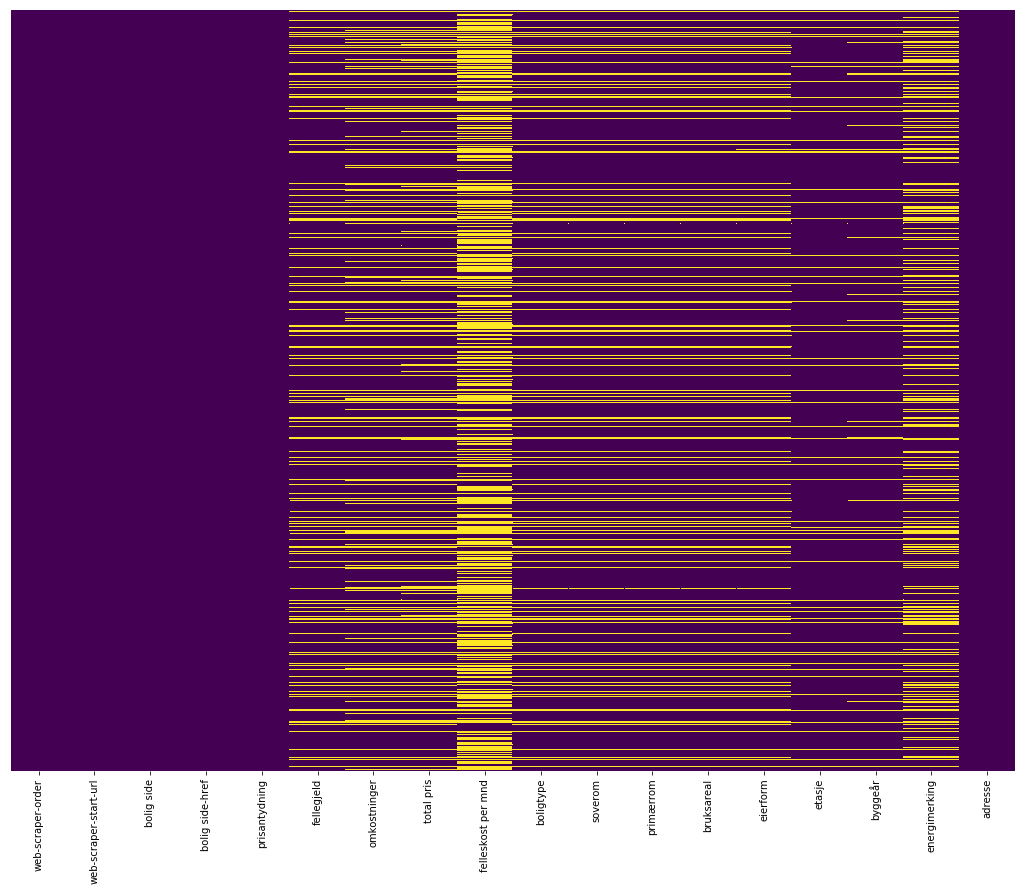

In [6]:
plt.figure(figsize=(18,14))
sns.heatmap(df.dropna(thresh=4).isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [7]:
df = df.drop("felleskost per mnd", axis=1)

In [8]:
df_2 = df.dropna(axis=0)

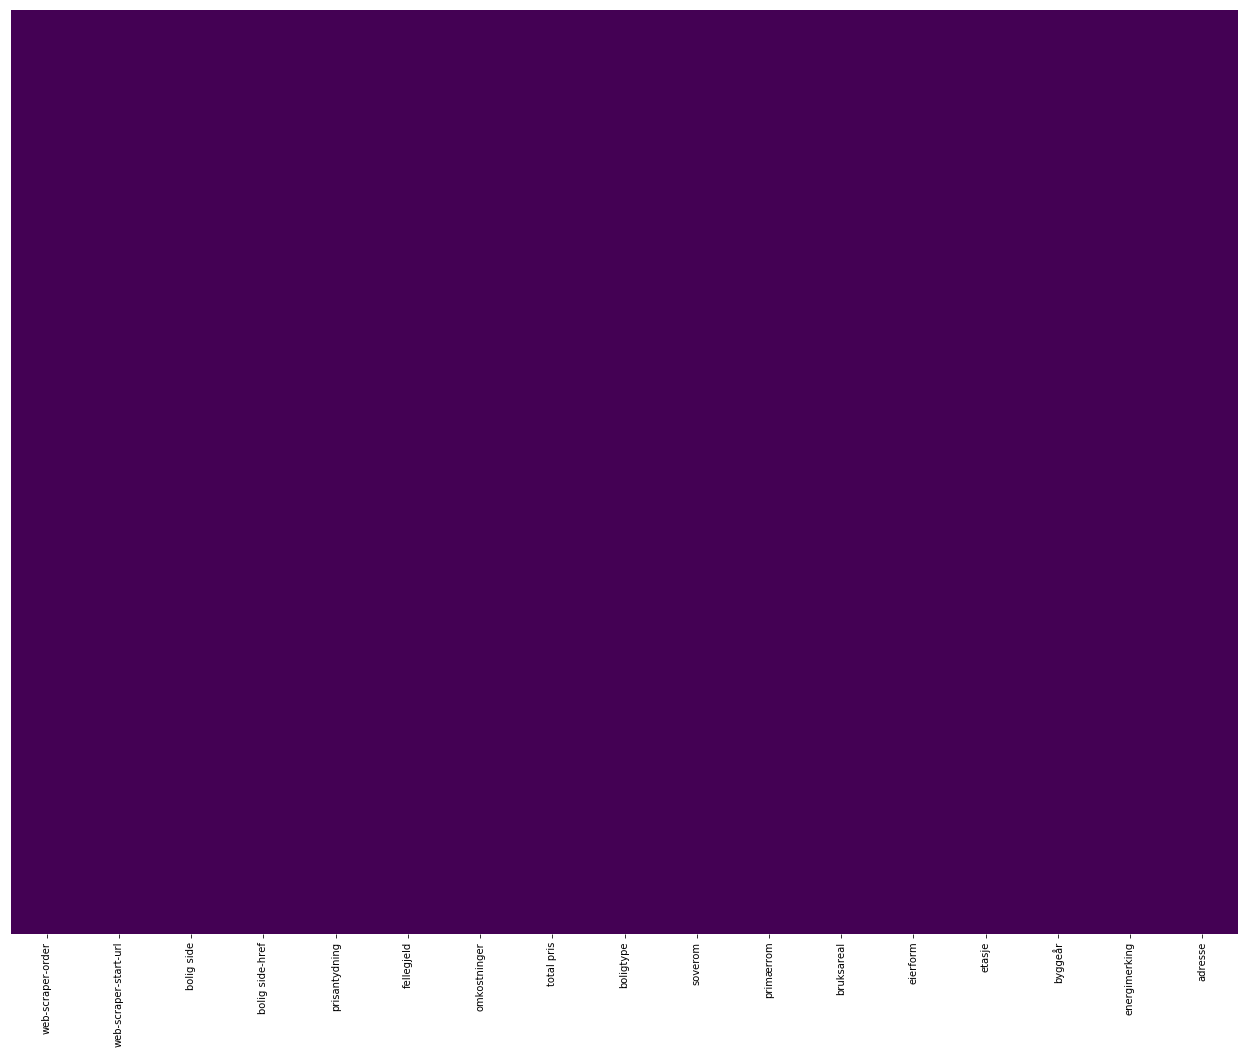

In [9]:
plt.figure(figsize=(22,17))
sns.heatmap(df_2.isnull(), cbar=False, cmap="viridis", yticklabels=False)

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1936
Data columns (total 17 columns):
web-scraper-order        1342 non-null object
web-scraper-start-url    1342 non-null object
bolig side               1342 non-null object
bolig side-href          1342 non-null object
prisantydning            1342 non-null object
fellegjeld               1342 non-null object
omkostninger             1342 non-null object
total pris               1342 non-null object
boligtype                1342 non-null object
soverom                  1342 non-null object
primærrom                1342 non-null object
bruksareal               1342 non-null object
eierform                 1342 non-null object
etasje                   1342 non-null object
byggeår                  1342 non-null object
energimerking            1342 non-null object
adresse                  1342 non-null object
dtypes: object(17)
memory usage: 188.7+ KB


In [11]:
df_2.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'bolig side',
       'bolig side-href', 'prisantydning', 'fellegjeld', 'omkostninger',
       'total pris', 'boligtype', 'soverom', 'primærrom', 'bruksareal',
       'eierform', 'etasje', 'byggeår', 'energimerking', 'adresse'],
      dtype='object')

In [12]:
df_2["fellesgjeld"] = df_2["fellegjeld"].apply(lambda x: x.split(" ")[0])
df_2["omkostninger"] = df_2["omkostninger"].apply(lambda x: x.split(" ")[0])
df_2["total pris"] = df_2["total pris"].apply(lambda x: x.split(" ")[0])
df_2["bruksareal"] = df_2["bruksareal"].apply(lambda x: x.split("m")[0])
df_2["primærrom"] = df_2["primærrom"].apply(lambda x: x.split("m")[0])
df_2["eierform"] = df_2["eierform"].apply(lambda x: x.split(" ")[0])
df_2["prisantydning"] = df_2["prisantydning"].apply(lambda x: x.split(" ")[0])
df_2.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,web-scraper-order,web-scraper-start-url,bolig side,bolig side-href,prisantydning,fellegjeld,omkostninger,total pris,boligtype,soverom,primærrom,bruksareal,eierform,etasje,byggeår,energimerking,adresse,fellesgjeld
1,1553724961-5198,https://www.finn.no/realestate/homes/search.ht...,"FAGERBORG/JESSENLØKKEN- Stor, gjennomgående se...",https://www.finn.no/realestate/homes/ad.html?f...,6 850 000,124 795 kr,191 222,7 166 017,Leilighet,1,96,97,Eier,4,1922,SOLGT,"Schwachs gate 2, 0365 Oslo",124 795
2,1553726316-5829,https://www.finn.no/realestate/homes/search.ht...,Solgt - visning dessverre avlyst!,https://www.finn.no/realestate/homes/ad.html?f...,4 600 000,7 960 kr,4 607 960,3 505,Leilighet,2,66,66,Andel,2,2017,SOLGT,"Grenseveien 51, 0575 Oslo",7 960
3,1553726104-5731,https://www.finn.no/realestate/homes/search.ht...,Lindeberg - Lys og tiltalende 2(3)-roms selvei...,https://www.finn.no/realestate/homes/ad.html?f...,Lindeberg,97 558 kr,81 650,2 769 208,Leilighet,1,53,53,Eier,2,1956,mørkegrønn,"Lindeberglia 6, 1069 Oslo",97 558
5,1553724535-5006,https://www.finn.no/realestate/homes/search.ht...,Kragskogen/ Holmenkollen - Attraktiv og romsli...,https://www.finn.no/realestate/homes/ad.html?f...,4 250 000,22 980 kr,4 272 980,2 226,Leilighet,1,62,62,Eier,1,1980,rød,"Olav Aukrusts vei 16, 0785 Oslo",22 980
6,1553725988-5677,https://www.finn.no/realestate/homes/search.ht...,OPPSAL/TRASOP: Gjennomgående 3-roms leilighet ...,https://www.finn.no/realestate/homes/ad.html?f...,4 300 000,9 371 kr,12 319,4 321 690,Leilighet,2,71,74,Andel,4,2015,oransje,"Hellerudveien 69A, 0684 Oslo",9 371


In [13]:
df_2[["fellesgjeld", "total pris", "omkostninger"]].head()

,fellesgjeld,total pris,omkostninger
1,124 795,7 166 017,191 222
2,7 960,3 505,4 607 960
3,97 558,2 769 208,81 650
5,22 980,2 226,4 272 980
6,9 371,4 321 690,12 319


In [14]:
df_2["fellesgjeld"] = df_2["fellesgjeld"].apply(lambda x: normalize("NFKD", x))
df_2["total pris"] = df_2["total pris"].apply(lambda x: normalize("NFKD", x))
df_2["omkostninger"] = df_2["omkostninger"].apply(lambda x: normalize("NFKD", x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [15]:
df_2["fellesgjeld"] = df_2["fellesgjeld"].apply(lambda x: x.replace(" ", ""))
df_2["total pris"] = df_2["total pris"].apply(lambda x: x.replace(" ", ""))
df_2["omkostninger"] = df_2["omkostninger"].apply(lambda x: x.replace(" ", ""))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [16]:
df_2["fellesgjeld"] = df_2["fellesgjeld"].apply(lambda x: int(x))
df_2["total pris"] = df_2["total pris"].apply(lambda x: int(x))
df_2["omkostninger"] = df_2["omkostninger"].apply(lambda x: int(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [17]:
df_2[["soverom", "primærrom", "bruksareal", "eierform", "etasje", "byggeår"]].head()

,soverom,primærrom,bruksareal,eierform,etasje,byggeår
1,1,96,97,Eier,4,1922
2,2,66,66,Andel,2,2017
3,1,53,53,Eier,2,1956
5,1,62,62,Eier,1,1980
6,2,71,74,Andel,4,2015


In [19]:
indxs= []
for i in range(np.size(df_2["eierform"])):
    if df_2["eierform"].iloc[i] != "Eier" and df_2["eierform"].iloc[i] != "Andel" and df_2["eierform"].iloc[i] != "Aksje":
        indxs.append(i)
df_2.drop(df_2.index[indxs], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df_3 = pd.DataFrame({"Byggeår": df_2["byggeår"]})
df_3["total pris"] = pd.np.max(df_2[["omkostninger", "fellesgjeld", "total pris"]], axis=1)

In [21]:
df_3[["soverom", "primærrom", "bruksareal", "eierform"]] = df_2[["soverom", "primærrom", "bruksareal", "eierform"]]

In [22]:
df_3[["Etasje", "Energimerking"]] = df_2[["etasje", "energimerking"]]

In [23]:
for i in range(np.size(df_3["Etasje"])):
    if len(df_3["Etasje"].iloc[i]) > 2 and len(df_3["Byggeår"].iloc[i]) != 4:
        df_3["Byggeår"].iloc[i] = df_3["Etasje"].iloc[i]
        df_3["Etasje"].iloc[i] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df_2["eierform"].value_counts()

Eier     627
Andel    587
Aksje     74
Name: eierform, dtype: int64

In [25]:
df_3.head(2)

,Byggeår,total pris,soverom,primærrom,bruksareal,eierform,Etasje,Energimerking
1,1922,7166017,1,96,97,Eier,4,SOLGT
2,2017,4607960,2,66,66,Andel,2,SOLGT


In [26]:
df_2[["etasje", "byggeår"]].apply(lambda x: len(x))

etasje     1288
byggeår    1288
dtype: int64

In [27]:
df_2["etasje"].apply(lambda x: x if len(x)<3 else x.index)

1                                                       4
2                                                       2
3                                                       2
5                                                       1
6                                                       4
7                                                       5
8                                                       2
9                                                       5
10      <built-in method index of str object at 0x10f8...
12      <built-in method index of str object at 0x10f8...
14                                                      4
17                                                      1
18                                                      5
20                                                      1
22                                                      4
29                                                      2
32                                                      1
34            

In [28]:
idx=[]
for i in range(np.size(df_3["Etasje"])):
    if len(df_3["Byggeår"].iloc[i]) != 4:
        idx.append(i)

In [29]:
idx

[137, 818]

In [30]:
df_3 = df_3.drop(df_3.index[idx])

In [31]:
df_2 = df_2.drop(df_2.index[idx])

In [32]:
df_3["Etasje"].value_counts()

2     255
0     229
3     228
4     202
1     197
5      88
6      31
7      18
8      16
11      5
9       5
13      3
12      3
-1      3
-4      1
14      1
10      1
Name: Etasje, dtype: int64

In [33]:
df_3["url"]= df_2["bolig side-href"]

In [34]:
for i in range(np.size(df_3["Etasje"])):
    if len(str(df_3["Etasje"].iloc[i])) > 2:
        df_3["Etasje"].iloc[i]=0

In [35]:
df_3["boligtype"] = df_2["boligtype"]

In [36]:
df_3.head()

,Byggeår,total pris,soverom,primærrom,bruksareal,eierform,Etasje,Energimerking,url,boligtype
1,1922,7166017,1,96,97,Eier,4,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet
2,2017,4607960,2,66,66,Andel,2,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet
3,1956,2769208,1,53,53,Eier,2,mørkegrønn,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet
5,1980,4272980,1,62,62,Eier,1,rød,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet
6,2015,4321690,2,71,74,Andel,4,oransje,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet


In [37]:
a = 0
leil = 0
for i in range(np.size(df_3["Etasje"])):
    if df_3["Etasje"].iloc[i] == 0:
        a+=1
        if df_3["boligtype"].iloc[i] == "Leilighet":
            leil += 1
            print(df_3["url"].iloc[i], "-", df_3["boligtype"].iloc[i])
print(a, leil)

https://www.finn.no/realestate/homes/ad.html?finnkode=138633416 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142731528 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142453547 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142555922 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=133360711 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142526501 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=134415262 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=140861623 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142716516 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142551046 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=143280601 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142616296 - Leilighet
https://www.finn.no/realestate/homes/ad.html?finnkode=142830030 - Leilighet
https://www.

One can see that "Leiligheter" are on the first floor and that houses are either at the first floor or at ground level.

In [38]:
# convert Leiligheter on the zeroth floor to first floor
for i in range(np.size(df_3["Etasje"])):
    if df_3["Etasje"].iloc[i] == 0:
        if df_3["boligtype"].iloc[i] == "Leilighet":
            df_3["Etasje"].iloc[i] = 1

In [39]:
df_3["adresse"] = df_2["adresse"]

In [40]:
df_3

,Byggeår,total pris,soverom,primærrom,bruksareal,eierform,Etasje,Energimerking,url,boligtype,adresse
1,1922,7166017,1,96,97,Eier,4,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Schwachs gate 2, 0365 Oslo"
2,2017,4607960,2,66,66,Andel,2,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Grenseveien 51, 0575 Oslo"
3,1956,2769208,1,53,53,Eier,2,mørkegrønn,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Lindeberglia 6, 1069 Oslo"
5,1980,4272980,1,62,62,Eier,1,rød,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Olav Aukrusts vei 16, 0785 Oslo"
6,2015,4321690,2,71,74,Andel,4,oransje,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Hellerudveien 69A, 0684 Oslo"
7,1902,6119400,2,68,68,Eier,5,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Hegdehaugsveien 23, 0352 Oslo"
8,1898,4979785,2,59,59,Andel,2,rød,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Maridalsveien 35B, 0174 Oslo"
9,2000,4886007,1,57,57,Eier,5,rød,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Middelthuns gate 21B, 0368 Oslo"
10,1919,7814842,2,89,91,Andel,1,oransje,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Aud Schønemanns vei 5, 0576 Oslo"
12,1998,25127650,6,395,395,Eier,0,gul,https://www.finn.no/realestate/homes/ad.html?f...,Enebolig,"Sollerudveien 10C, 0283 Oslo"


In [41]:
df_3["Energimerking"].value_counts()

rød           408
SOLGT         362
mørkegrønn    272
oransje       161
lysegrønn      53
gul            30
Name: Energimerking, dtype: int64

In [42]:
df_3["Etasje"] = df_3["Etasje"].astype(int)
df_3["soverom"] = df_3["soverom"].astype(int)
df_3["Byggeår"] = pd.to_datetime(df_3["Byggeår"])

In [43]:
df_3["bruksareal"] = df_3["bruksareal"].astype(float)
df_3["primærrom"] = df_3["primærrom"].astype(float)

In [44]:
df_3["Byggeår"] = df_3["Byggeår"].apply(lambda x: x.year)

In [45]:
df_3.dtypes

Byggeår            int64
total pris         int64
soverom            int64
primærrom        float64
bruksareal       float64
eierform          object
Etasje             int64
Energimerking     object
url               object
boligtype         object
adresse           object
dtype: object

In [46]:
df_2.dtypes

web-scraper-order        object
web-scraper-start-url    object
bolig side               object
bolig side-href          object
prisantydning            object
fellegjeld               object
omkostninger              int64
total pris                int64
boligtype                object
soverom                  object
primærrom                object
bruksareal               object
eierform                 object
etasje                   object
byggeår                  object
energimerking            object
adresse                  object
fellesgjeld               int64
dtype: object

In [47]:
theras = df_3[df_3["total pris"]< 3000000]
theras = theras[theras["soverom"] > 1]

TypeError: '>' not supported between instances of 'str' and 'int'

In [48]:
for i in range(np.size(theras["url"])):
    print(theras["url"].iloc[i])
theras["Byggeår"].iloc[30]

https://www.finn.no/realestate/homes/ad.html?finnkode=143110744
https://www.finn.no/realestate/homes/ad.html?finnkode=142860613
https://www.finn.no/realestate/homes/ad.html?finnkode=143120016
https://www.finn.no/realestate/homes/ad.html?finnkode=143022014
https://www.finn.no/realestate/homes/ad.html?finnkode=143015284
https://www.finn.no/realestate/homes/ad.html?finnkode=143122199
https://www.finn.no/realestate/homes/ad.html?finnkode=143096094
https://www.finn.no/realestate/homes/ad.html?finnkode=143013976
https://www.finn.no/realestate/homes/ad.html?finnkode=142537001
https://www.finn.no/realestate/homes/ad.html?finnkode=142625699
https://www.finn.no/realestate/homes/ad.html?finnkode=142250434
https://www.finn.no/realestate/homes/ad.html?finnkode=143191553
https://www.finn.no/realestate/homes/ad.html?finnkode=140912826
https://www.finn.no/realestate/homes/ad.html?finnkode=143318688
https://www.finn.no/realestate/homes/ad.html?finnkode=141940241
https://www.finn.no/realestate/homes/ad.

'1967'

In [49]:
theras["url"]

3       https://www.finn.no/realestate/homes/ad.html?f...
32      https://www.finn.no/realestate/homes/ad.html?f...
84      https://www.finn.no/realestate/homes/ad.html?f...
124     https://www.finn.no/realestate/homes/ad.html?f...
125     https://www.finn.no/realestate/homes/ad.html?f...
142     https://www.finn.no/realestate/homes/ad.html?f...
152     https://www.finn.no/realestate/homes/ad.html?f...
184     https://www.finn.no/realestate/homes/ad.html?f...
194     https://www.finn.no/realestate/homes/ad.html?f...
232     https://www.finn.no/realestate/homes/ad.html?f...
241     https://www.finn.no/realestate/homes/ad.html?f...
243     https://www.finn.no/realestate/homes/ad.html?f...
259     https://www.finn.no/realestate/homes/ad.html?f...
277     https://www.finn.no/realestate/homes/ad.html?f...
301     https://www.finn.no/realestate/homes/ad.html?f...
306     https://www.finn.no/realestate/homes/ad.html?f...
318     https://www.finn.no/realestate/homes/ad.html?f...
324     https:

In [50]:
df_3["adresse"].head()

1         Schwachs gate 2, 0365 Oslo
2          Grenseveien 51, 0575 Oslo
3          Lindeberglia 6, 1069 Oslo
5    Olav Aukrusts vei 16, 0785 Oslo
6       Hellerudveien 69A, 0684 Oslo
Name: adresse, dtype: object

In [66]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [63]:
df_3["lat"] = pd.DataFrame({"lat":[]})
df_3["lng"] = pd.DataFrame({"lng":[]})

In [53]:
driver = webdriver.Chrome("../../../../../Desktop/chromedriver")
for i in range(np.size(df_3["adresse"])):
    driver.get("https://www.latlong.net/convert-address-to-lat-long.html")
    element=driver.find_element_by_class_name('width70')
    element.click()
    element.send_keys(df_3["adresse"].iloc[i])
    driver.find_element_by_id("btnfind").click()
    time.sleep(3.2)
    coordinate_element = driver.find_elements_by_id("latlngspan")
    lat_lng = [x.text for x in coordinate_element][0]
    tmp_arr = lat_lng.replace(")", "").replace("(", "").split(",")
    lat = tmp_arr[0]
    lng = tmp_arr[1]
    df_3["lat"].iloc[i] = lat
    df_3["lng"].iloc[i] = lng

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=73.0.3683.86)
  (Driver info: chromedriver=73.0.3683.68 (47787ec04b6e38e22703e856e101e840b65afe72),platform=Mac OS X 10.14.3 x86_64)


# run the below code daily
https://www.latlong.net/convert-address-to-lat-long.html limit: 50 daily queries

In [82]:
count = np.size(df_3[df_3["lng"].isnull()==False], axis=0)
driver = webdriver.Chrome("../../../../../Desktop/chromedriver")
for i in range(np.size(df_3["lng"][df_3["lng"].isnull()==True])):
    driver.get("https://www.latlong.net/convert-address-to-lat-long.html")
    element=driver.find_element_by_class_name('width70')
    element.click()
    element.send_keys(df_3[df_3["lng"].isnull()==True]["adresse"].iloc[0])
    driver.find_element_by_id("btnfind").click()
    time.sleep(3.2)
    coordinate_element = driver.find_elements_by_id("latlngspan")
    lat_lng = [x.text for x in coordinate_element][0]
    tmp_arr = lat_lng.replace(")", "").replace("(", "").split(",")
    lat = tmp_arr[0]
    lng = tmp_arr[1]
    df_3["lat"].iloc[count] = lat
    df_3["lng"].iloc[count] = lng
    count += 1

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=73.0.3683.103)
  (Driver info: chromedriver=73.0.3683.68 (47787ec04b6e38e22703e856e101e840b65afe72),platform=Mac OS X 10.14.3 x86_64)


In [85]:
count = np.size(df_3[df_3["lng"].isnull()==False], axis=0)
driver = webdriver.Chrome("../../../../../Desktop/chromedriver")

for i in range(np.size(df_3["lng"][df_3["lng"].isnull()==True])):
    driver.get("https://www.gps-coordinates.net/")
    element=driver.find_element_by_xpath("//input[@type='text' and @id='address']")
    driver.execute_script("window.scrollTo(300,600);")
    time.sleep(7)
    element.click()
    element.clear()
    element.send_keys(df_3[df_3["lng"].isnull()==True]["adresse"].iloc[i])
    btn=driver.find_element_by_xpath("//button[@type='button' and @class='btn btn-primary']")
    btn.click()
    print(df_3["adresse"].iloc[count])
    time.sleep(1.8)
    driver.execute_script("window.scrollTo(295,595);")
    time.sleep(4.8)
    coordinate_element = driver.find_element_by_id('info_window').text
    lat_lng = coordinate_element.replace("\nLatitude:","").replace("| Longitude: ","").replace("\n\nGet Altitude","").split(" ")[-1:-3:-1]
    lat = lat_lng[1]
    lng = lat_lng[0]
    df_3["lat"].iloc[count] = lat
    df_3["lng"].iloc[count] = lng
    count += 1

Munkerudveien 77 A, 1165 Oslo


IndexError: list index out of range

In [79]:
df_3.dtypes

Byggeår            int64
total pris         int64
soverom            int64
primærrom        float64
bruksareal       float64
eierform          object
Etasje             int64
Energimerking     object
url               object
boligtype         object
adresse           object
lat               object
lng               object
dtype: object

In [ ]:
break

In [ ]:
sns.pairplot(df_3.drop(["url", "boligtype", "Energimerking"], axis=1), diag_kind="kde")

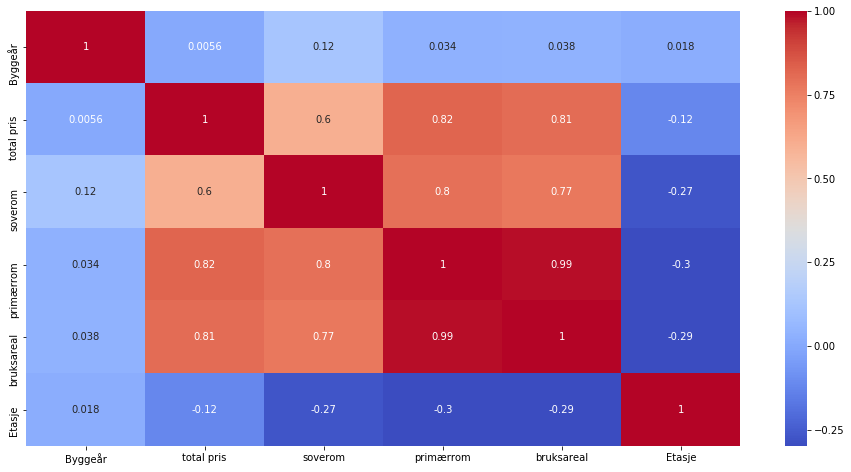

In [412]:
plt.figure(figsize=(16,8))
sns.heatmap(df_3.corr(), annot=True, cmap="coolwarm")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


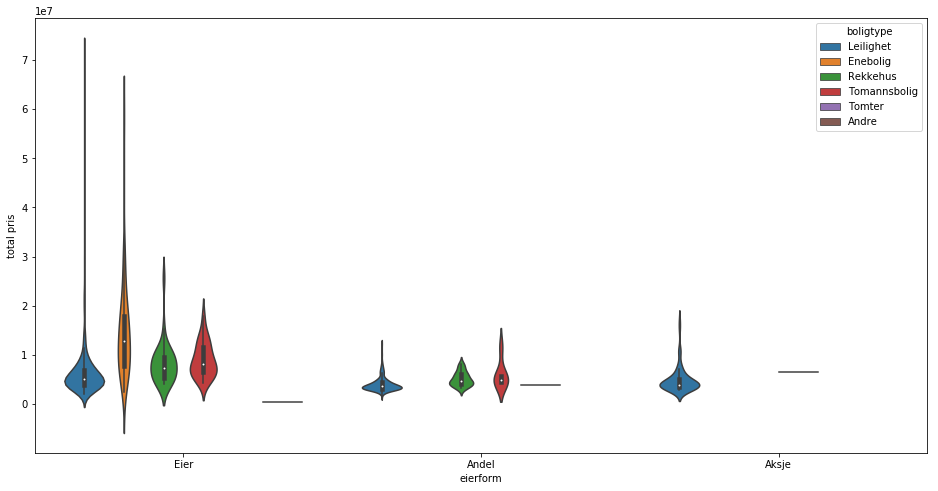

In [47]:
plt.figure(figsize=(16,8))
sns.violinplot(y="total pris", x="eierform", hue="boligtype", data=df_3)

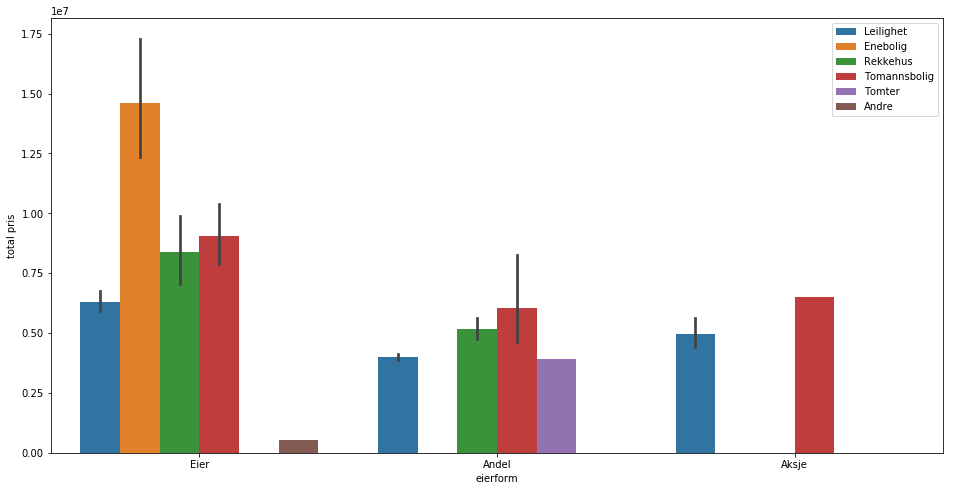

In [48]:
plt.figure(figsize=(16,8))
ax=sns.barplot(x="eierform", y="total pris", data=df_3, hue="boligtype")
ax.legend(loc=1)

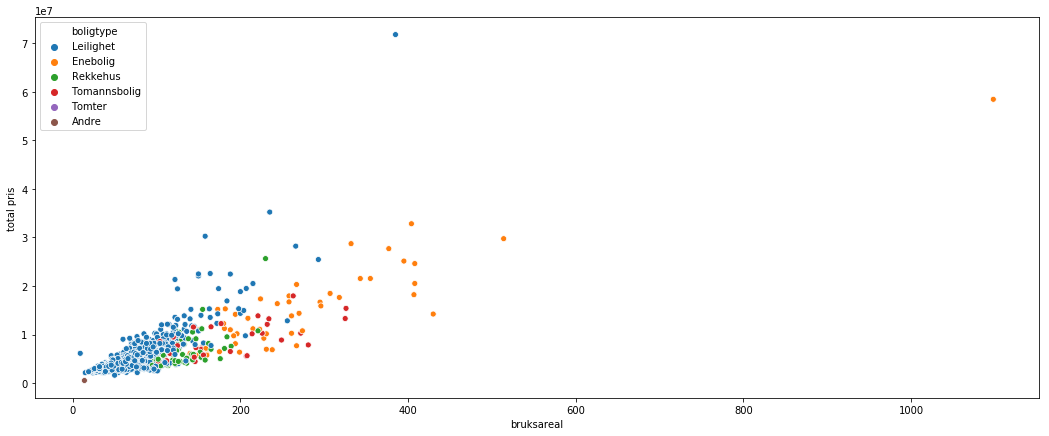

In [49]:
plt.figure(figsize=(18,7))
sns.scatterplot(y="total pris", x="bruksareal", hue="boligtype", data=df_3)

<Figure size 2160x720 with 0 Axes>

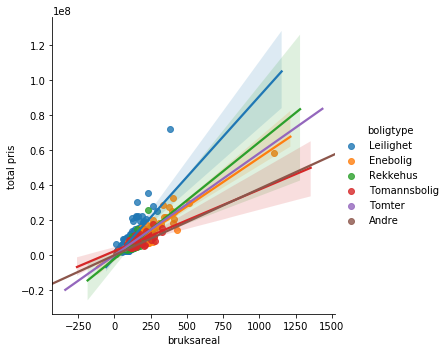

In [50]:
plt.figure(figsize=(30,10))
sns.lmplot(y="total pris", x="bruksareal", hue="boligtype", data=df_3)

In [51]:
df_2["adresse"].apply(lambda x: x.split(",")[1].split(" ")[1]).value_counts() # Find zip code

0585     22
0195     20
0580     15
0655     13
0661     13
0368     12
0252     12
0566     12
1155     11
0562     11
0657     11
0267     10
0564      9
0194      9
0687      9
0652      8
0469      8
0365      8
0481      8
1069      8
1263      8
0484      8
0192      8
0263      7
0467      7
0570      7
0190      7
0357      7
0684      7
0266      7
         ..
0969      1
0854      1
1154      1
0583      1
0884      1
0560      1
1252      1
0876      1
1179      1
1273      1
0559      1
1270      1
0757      1
0788      1
0370      1
0779      1
1051      1
0764      1
0766      1
0978      1
1284      1
0976      1
rolig     1
0758      1
1184      1
leil.     1
1262      1
1065      1
0186      1
0182      1
Name: adresse, Length: 347, dtype: int64

In [53]:
df_3.columns

Index(['Byggeår', 'total pris', 'soverom', 'primærrom', 'bruksareal',
       'eierform', 'Etasje', 'Energimerking', 'url', 'boligtype', 'adresse'],
      dtype='object')

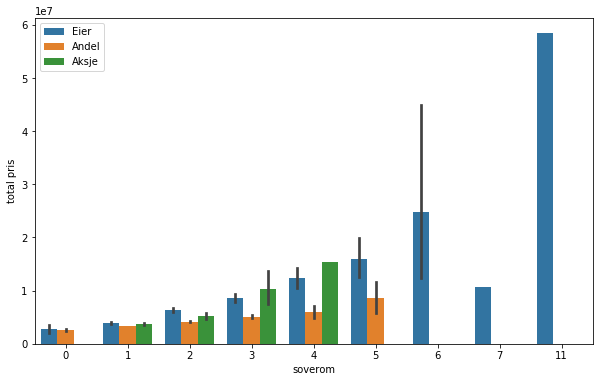

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x="soverom", y="total pris", hue="eierform",data=df_3)
plt.legend(loc=2)

In [64]:
df_3.head()

,Byggeår,total pris,soverom,primærrom,bruksareal,eierform,Etasje,Energimerking,url,boligtype,adresse,lat,lng
1,1922,7166017,1,96.0,97.0,Eier,4,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Schwachs gate 2, 0365 Oslo",NaN,NaN
2,2017,4607960,2,66.0,66.0,Andel,2,SOLGT,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Grenseveien 51, 0575 Oslo",NaN,NaN
3,1956,2769208,1,53.0,53.0,Eier,2,mørkegrønn,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Lindeberglia 6, 1069 Oslo",NaN,NaN
5,1980,4272980,1,62.0,62.0,Eier,1,rød,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Olav Aukrusts vei 16, 0785 Oslo",NaN,NaN
6,2015,4321690,2,71.0,74.0,Andel,4,oransje,https://www.finn.no/realestate/homes/ad.html?f...,Leilighet,"Hellerudveien 69A, 0684 Oslo",NaN,NaN
